<a href="https://colab.research.google.com/github/Negfir/Deep-Learning-HWs/blob/main/HW2/DL_HW2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(1)
np.random.seed(1)

DATASET_SIZE = 5000
batch = 64

In [90]:
label0 = np.zeros((DATASET_SIZE, 1), dtype=int)
label1 = np.ones((DATASET_SIZE, 1), dtype=int)

r = np.random.normal(0, 1, size=(DATASET_SIZE,1))
t = np.random.uniform(0,2*np.pi, size=(DATASET_SIZE,1))

x0 = np.concatenate((np.cos(t) * r, np.sin(t) * r, label0), axis=1)
x1 = np.concatenate((np.cos(t) * (r + 5), np.sin(t) * (r + 5), label1), axis=1)

dataset = np.concatenate((x0, x1), axis=0)



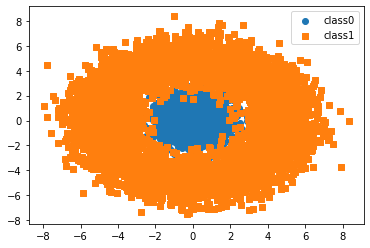

In [91]:
plt.scatter(x0[:,0], x0[:,1], label='class0')
plt.scatter(x1[:,0], x1[:,1], label='class1', marker='s')
plt.legend()
plt.show()

In [92]:
# x_data = torch.tensor(dataset[:,0:2],requires_grad=True, dtype = torch.float32)
# y_data = torch.tensor(dataset[:,2],dtype = torch.int64)
data = torch.utils.data.TensorDataset(torch.Tensor(dataset[:,0:2]), torch.Tensor(dataset[:,2]))
# data = torch.utils.data.TensorDataset(x_data, y_data)
print(len(data))
data_trainset, data_valset = torch.utils.data.random_split(data, lengths=[int(2*DATASET_SIZE*0.8), int(2*DATASET_SIZE*0.2)])

train_data = torch.utils.data.DataLoader(data_trainset, batch_size=batch, shuffle=True)
val_data = torch.utils.data.DataLoader(data_valset, batch_size=batch, shuffle=False)


10000


In [49]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [97]:
class Network(nn.Module):
    def __init__(self, n_in, n_hidden):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(n_in, n_hidden)
        self.layer2 = nn.Linear(n_hidden, 2)
    
    def forward(self, x):
        # out = self.layer2(torch.relu(self.layer1(x)))
        # print(out.requires_grad)
        return self.layer2(torch.relu(self.layer1(x)))

model = Network(n_in=2, n_hidden=8)#.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()


Epoch 0: 
Train loss: 0.010752405971288681 train acc: 38.0000
Validation loss: 0.03409186378121376 Validation acc: 51.2000
Epoch 1: 
Train loss: 0.009103022515773773 train acc: 52.7875
Validation loss: 0.03096861019730568 Validation acc: 55.5000
Epoch 2: 
Train loss: 0.008180968463420868 train acc: 63.4250
Validation loss: 0.028666088357567787 Validation acc: 73.8000
Epoch 3: 
Train loss: 0.008451252244412899 train acc: 80.6750
Validation loss: 0.026594610884785652 Validation acc: 86.2000
Epoch 4: 
Train loss: 0.006437753327190876 train acc: 87.9000
Validation loss: 0.024584107100963593 Validation acc: 90.3000
Epoch 5: 
Train loss: 0.006885025650262833 train acc: 91.3375
Validation loss: 0.022717082872986794 Validation acc: 93.5500
Epoch 6: 
Train loss: 0.006627392489463091 train acc: 93.2875
Validation loss: 0.020987095311284065 Validation acc: 95.1500
Epoch 7: 
Train loss: 0.004667327273637056 train acc: 94.7125
Validation loss: 0.019426379352808 Validation acc: 96.1000
Epoch 8: 
Tra

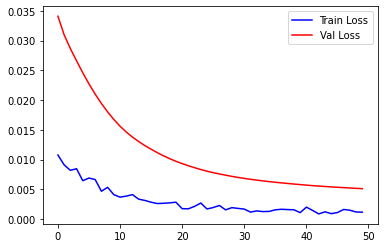

In [98]:
n_epoch = 50
train_losses = []
val_losses = []
for epoch in range(n_epoch):
    
    # training loop here
        
    model.train() # signal train phase
    train_loss = 0.0
    val_loss = 0.0
    number_of_sub_epoch = 0
    correct_t =0
    total_t = 0
    for x, y in train_data:
        # x, y = x.to(device, dtype=torch.int64), y.to(device, dtype=torch.int64) # move the data to cuda
        # print(x.shape, y.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_hat = model(x)
        # print(y_hat)
        # print(y)
        y = y.type(torch.int64)
        # y_hat = y_hat.float()
        train_loss = criterion(y_hat,y)
        train_loss += train_loss.item()
        train_loss.backward()
        optimizer.step()
        
        number_of_sub_epoch += 1
        _,pred_t = torch.max(y_hat, dim=1)
        correct_t += torch.sum(pred_t==y).item()
        total_t += y.size(0)
    train_losses.append(train_loss / number_of_sub_epoch)
    print("Epoch {}: \nTrain loss: {}".format(epoch, train_loss / number_of_sub_epoch), f'train acc: {(100 * correct_t / total_t):.4f}')
    
    number_of_sub_epoch = 0
    correct_t =0
    total_t = 0
    model.eval()
    with torch.no_grad():
        for x_val,y_val in val_data:
            y_hat = model(x_val)
            y_val = y_val.type(torch.int64)
            val_loss = criterion(y_hat, y_val)
            val_loss += val_loss.item()
            number_of_sub_epoch += 1
            _,pred_t = torch.max(y_hat, dim=1)
            correct_t += torch.sum(pred_t==y_val).item()
            total_t += y_val.size(0)
        val_losses.append(val_loss / number_of_sub_epoch)
    print("Validation loss: {}".format(val_loss / number_of_sub_epoch), f'Validation acc: {(100 * correct_t / total_t):.4f}')


    
    # print("%d\tbatch-loss: %.4f\tbatch-acc: %.4f\tval-loss: %.4f\tval-acc: %.4f"%(
    #     epoch, val_loss))
plt.plot(range(n_epoch), train_losses, label='Train Loss', c='b')
plt.plot(range(n_epoch), val_losses, label='Val Loss', c='r')
plt.legend()
plt.show()